# **Context**
An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at \$121.61 billion in 2019 and is projected to reach
$1,039.03 billion by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.

# **Objective**

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to **analyze the data and come up with a linear regression model to determine the driving factors for first-day viewership**.

# **Data Description**

The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

### **Data Dictionary:**
* **visitors:** Average number of visitors, in millions, to the platform in the past week
* **ad_impressions:** Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
* **major_sports_event:** Any major sports event on the day
* **genre:** Genre of the content
* **dayofweek:** Day of the release of the content
* **season:** Season of the release of the content
* **views_trailer:** Number of views, in millions, of the content trailer
* **views_content:** Number of first-day views, in millions, of the content

# **Important Note**
The following questions need to be answered as a part of the EDA section of the project:

1. What does the distribution of content views look like?
2. What does the distribution of genres look like?
3. The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?
4. How does the viewership vary with the season of release?
5. What is the correlation between trailer views and content views?

**Kindly ensure to thoroughly examine all variables of the data in EDA, going beyond the above questions.**

# **Installing  and Importing Necessary Libraries**

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

# **Loading the dataset**

In [2]:
df = pd.read_csv('/content/ottdata.csv')

# **Data Overview**

The initial steps to get an overview of any dataset is to:
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not.
- Get information about the number of rows and columns in the dataset.
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [ ]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


## Statistical summary of the dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
major_sports_event,1000.0,0.40000,0.490143,0.00,0.0000,0.00,1.000,1.00
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


## Summary of the Data Overview

* There are 1000 rows with 8 columns.
* There are 4 columns with float, 1 column with integer, and 3 columns with object data type.
* As observed **`major_sports_event`** column can be a categorical data as it is categorized by 0 and 1.
* The columns **`ad_impressions`** and **`views_trailer`** can be assumed as not-normal data as the standard deviation is very high around **289.5** and **35** respectively.
* We can also observe that categorical data **`genre`**, **`dayofweek`**, **`season`** have 8, 7, 4 unique values; where the most occured values are "Others", "Friday" and "Winter" respectively.
* On that note we can say that most of the content are relased during Fridays of Winter. However, we can conclude this based on visualising.
* There are no duplicate or null values.

# **Exploratory Data Analysis (EDA) Summary**

## **Univariate Analysis**

### **For `visitors` column**

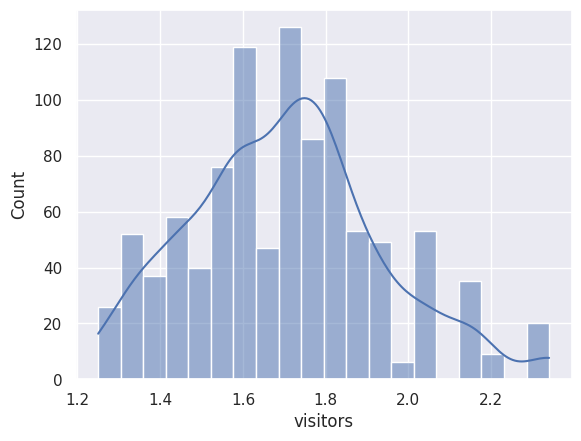

In [ ]:
sns.histplot(data = df, x = 'visitors', kde = True);

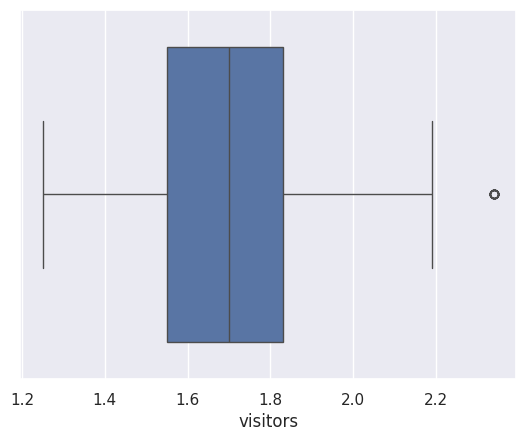

In [ ]:
sns.boxplot(data = df, x = 'visitors');

In [ ]:
df[df['visitors']>2.0].shape

(117, 8)

In [ ]:
df[df['visitors']>2.2].shape

(20, 8)

In [ ]:
df['visitors'].max()

2.34

In [ ]:
df['visitors'].median()

1.7

In [ ]:
df['visitors'].mean()

1.7042899999999999

In [ ]:
df['visitors'].min()

1.25

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['visitors'].quantile(0.25)
Q3 = df['visitors'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the maximum value for the box plot (upper whisker)
upper_whisker = Q3 + 1.5 * IQR

print("Upper Whisker (maximum value from the box plot):", upper_whisker)

Upper Whisker (maximum value from the box plot): 2.25


* We can observe that the column **`visitors`** is right skewed.
* `Maximum value = 2.34` and `Minimum value = 1.25` million for a week
* `Median = 1.7` and `Mean = 1.25`.
* From the boxplot we can observe that the Maximum value found is marked as an outlier. The number of rows having this value are **20**. Which can be neglected however, for the better performance of the model we can replace the values with the maximum value and check.

In [ ]:
data = df.copy()

In [ ]:
data['visitors'] = data['visitors'].apply(lambda x: 2.2 if x >= 2.2 else x)

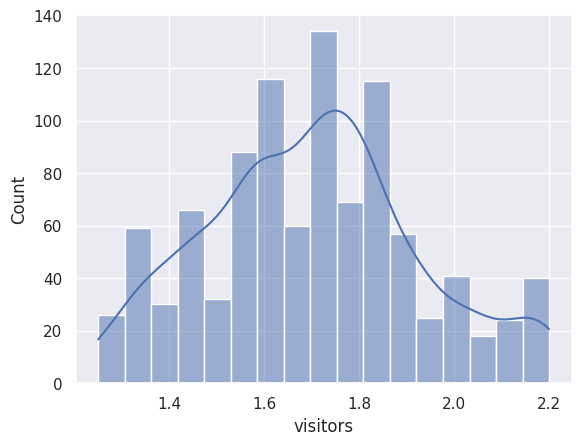

In [ ]:
sns.histplot(data = data, x = 'visitors', kde = True);

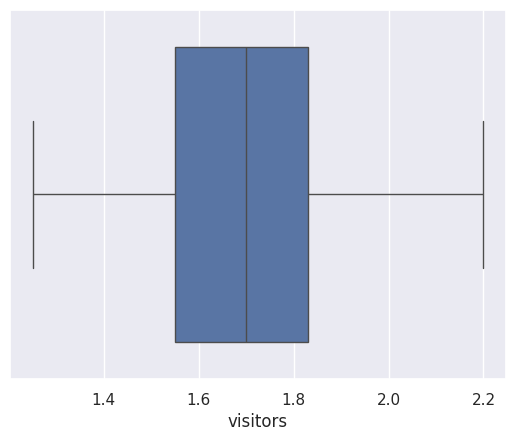

In [ ]:
sns.boxplot(data = data, x = 'visitors');

**Hence, we have treated the outliers with the value 2.2**

* The graph is right skewed.

### **For `ad_impressions` column**

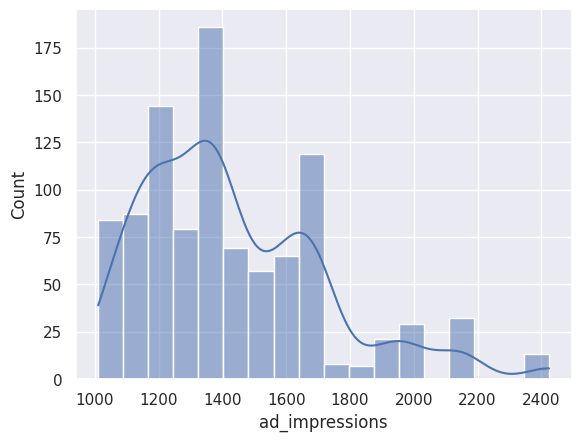

In [ ]:
sns.histplot(data = df, x = "ad_impressions", kde = True);

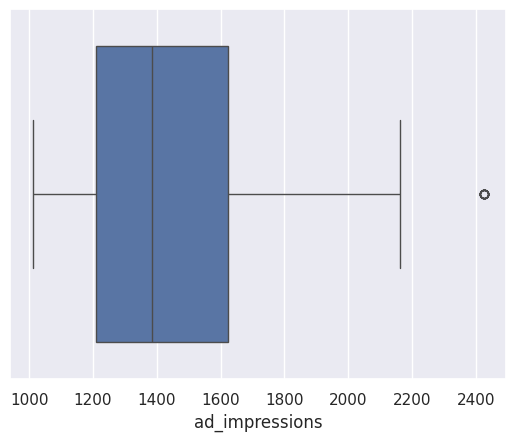

In [ ]:
sns.boxplot(data = df, x = "ad_impressions");

In [ ]:
df[df["ad_impressions"]>2190].shape

(13, 8)

In [ ]:
df[df["ad_impressions"]==2424.20].shape

(13, 8)

In [ ]:
df['ad_impressions'].median()

1383.58

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ad_impressions'].quantile(0.25)
Q3 = df['ad_impressions'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the maximum value for the box plot (upper whisker)
upper_whisker = Q3 + 1.5 * IQR

print("Upper Whisker (maximum value from the box plot):", upper_whisker)

Upper Whisker (maximum value from the box plot): 2243.6800000000003


* Right Skewed Graph
* The Ad immpressions above 2190 considered as outliers. These are around roughly 13 rows. Where the value is equal to **`2424.20`**, which is also the maximum value.


### **For `major_sports_event` column**

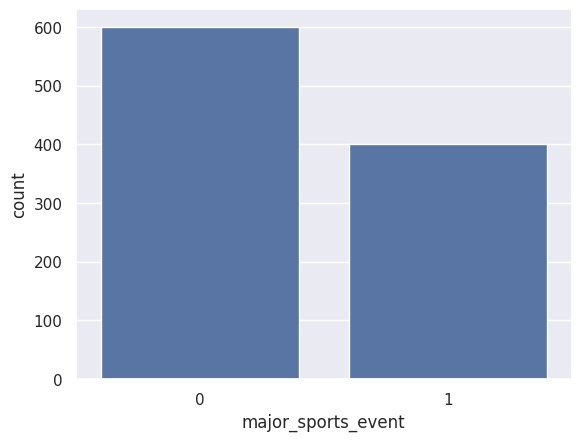

In [ ]:
sns.countplot(data = df, x = "major_sports_event");

In [ ]:
df['major_sports_event'].value_counts()/df.shape[0]*100

,count
major_sports_event,
0,60.0
1,40.0


* There are two values namely **`0`** and **`1`** representing if the major event is scheduleded for the day or not.
* 60% of data says the events are not organised and other 40% data for event organised for the day.

### **For `genre` column**

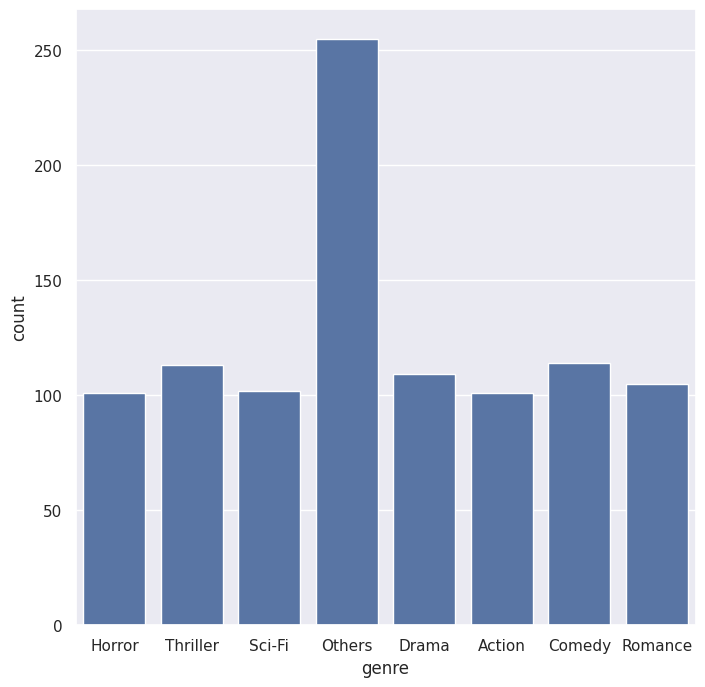

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data = df, x = "genre");
plt.show()

In [ ]:
df['genre'].value_counts()/df.shape[0]*100

,count
genre,
Others,25.5
Comedy,11.4
Thriller,11.3
Drama,10.9
Romance,10.5
Sci-Fi,10.2
Horror,10.1
Action,10.1


* There are 8 unique values for the column `genre`.
* The value with highest occurence is `Others` about 25.5%. Thevalue with least occurence are `Action`, `Horror` about 10.1% of the total data.
* Rest genre's range between 11.4% to 10.2%.

### **For `dayofweek` column**

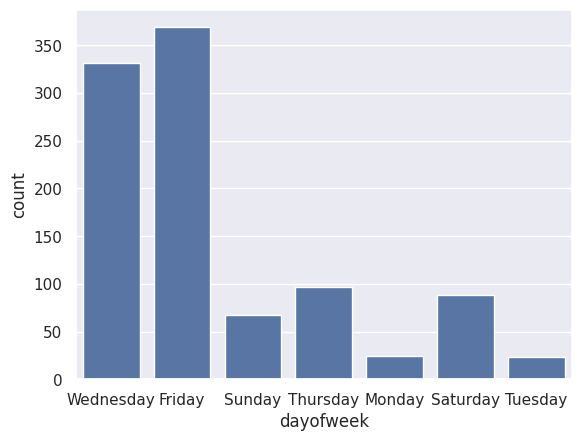

In [ ]:
sns.countplot(data = df, x = 'dayofweek');

In [ ]:
df['dayofweek'].value_counts()/df.shape[0]*100

,count
dayofweek,
Friday,36.9
Wednesday,33.2
Thursday,9.7
Saturday,8.8
Sunday,6.7
Monday,2.4
Tuesday,2.3


* There are 7 unique values for the column **`dayofweek`**.
* Mostly the content were released on **`Wednesday`** around 36.9% and follwed by **`Friday`** around 33.2%.
* The content were released least on **`Tuesday`** and **`Monday`** around 2.3% and 2.4% repectively.

### **For `season` column**

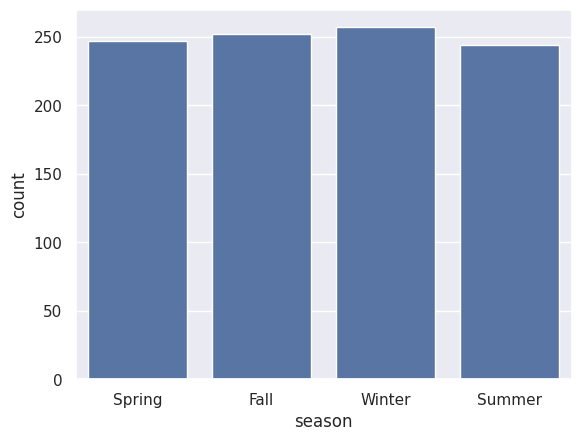

In [ ]:
sns.countplot(data = df, x = 'season');

In [ ]:
df['season'].value_counts()/df.shape[0]*100

,count
season,
Winter,25.7
Fall,25.2
Spring,24.7
Summer,24.4


In [3]:
df.groupby('season')['views_content'].mean()

,views_content
season,
Fall,0.445357
Spring,0.467166
Summer,0.496803
Winter,0.484669


* From the graph we can clearly notice that there is uniform distribution of content release across all the seasons of the year.
* However, preciesly speaking of Winter being the most at 25.7%, Fall at 25.2%, Spring at 24.7% and Summer at 24.4%. Ignoring the differences in decimal points we can conclude that it's a uniform.

### **For `views_trailer` column**

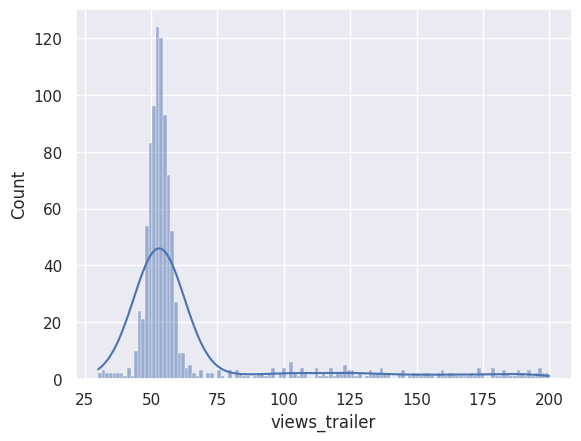

In [ ]:
sns.histplot(data = df, x = 'views_trailer', kde = True);

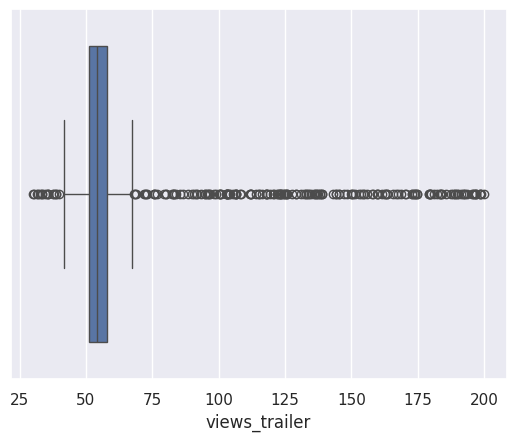

In [ ]:
sns.boxplot(data = df, x = 'views_trailer');

In [ ]:
df[df['views_trailer']>67.966].shape

(173, 8)

In [ ]:
df[df['views_trailer']<50].shape

(177, 8)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
visitors,1000.0,1.70429,0.231973,1.25,1.5500,1.70,1.830,2.34
ad_impressions,1000.0,1434.71229,289.534834,1010.87,1210.3300,1383.58,1623.670,2424.20
major_sports_event,1000.0,0.40000,0.490143,0.00,0.0000,0.00,1.000,1.00
views_trailer,1000.0,66.91559,35.001080,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,0.47340,0.105914,0.22,0.4000,0.45,0.520,0.89


In [ ]:
df['views_trailer'].median()

53.96

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['views_trailer'].quantile(0.25)
Q3 = df['views_trailer'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the maximum value for the box plot (upper whisker)
upper_whisker = Q3 + 1.5 * IQR

print("Upper Whisker (maximum value from the box plot):", upper_whisker)

Upper Whisker (maximum value from the box plot): 67.96624999999997


* Right skewed graph.
* There are 200 rows of data that is being represented as outliers.
* however, these values can be relaced with the maximum value obtained from the boxplot. Which is **`67.966`**

### **For `views_content` column**

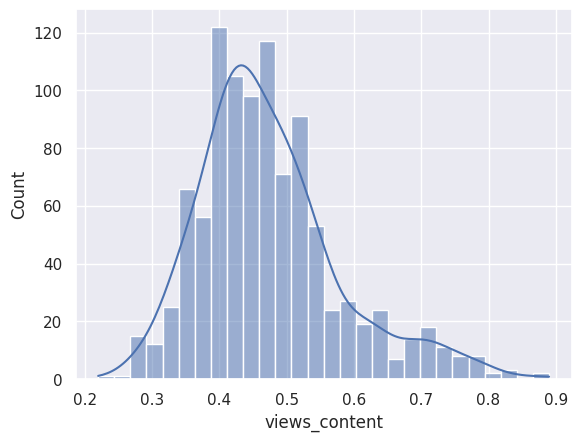

In [ ]:
sns.histplot(data = df, x = 'views_content', kde = True);

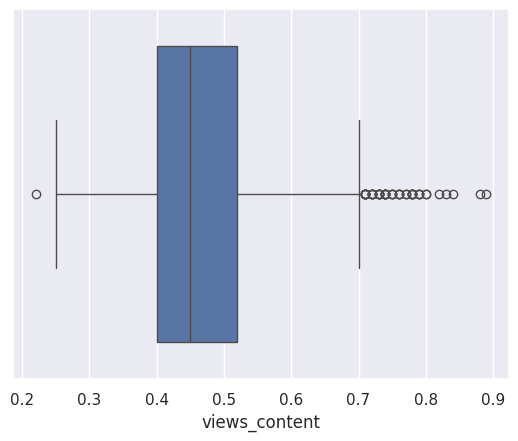

In [ ]:
sns.boxplot(data = df, x = 'views_content');

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['views_content'].quantile(0.25)
Q3 = df['views_content'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the maximum value for the box plot (upper whisker)
upper_whisker = Q3 + 1.5 * IQR

print("Upper Whisker (maximum value from the box plot):", upper_whisker)

Upper Whisker (maximum value from the box plot): 0.7


In [ ]:
df[df['views_content']>0.7].shape

(46, 8)

* It is a right skewed graph.
* the outliers exists. These outliers can be replaced with vale **`0.7`** which is obtained as the maximum value from the boxplot

## **Bivariate Analysis**

### **Correlation check**

In [ ]:
# creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

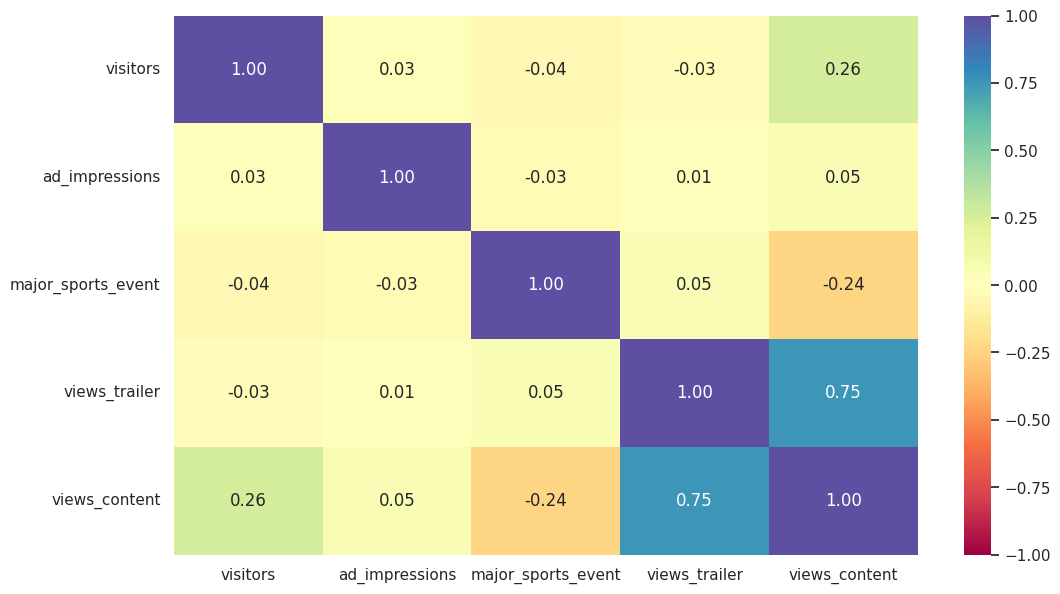

In [ ]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The highly positive correlated values are `views_trailer` and `views_content` with the value of `0.75`. We can infer that the higher the number of view on trailer will increase the views on the content by 0.75.
* The highly negatively coorelated values `major_sport_event` and `views_content` with the value of `-0.24`.

In [ ]:
df.head(2)

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32


<Figure size 1500x1500 with 0 Axes>

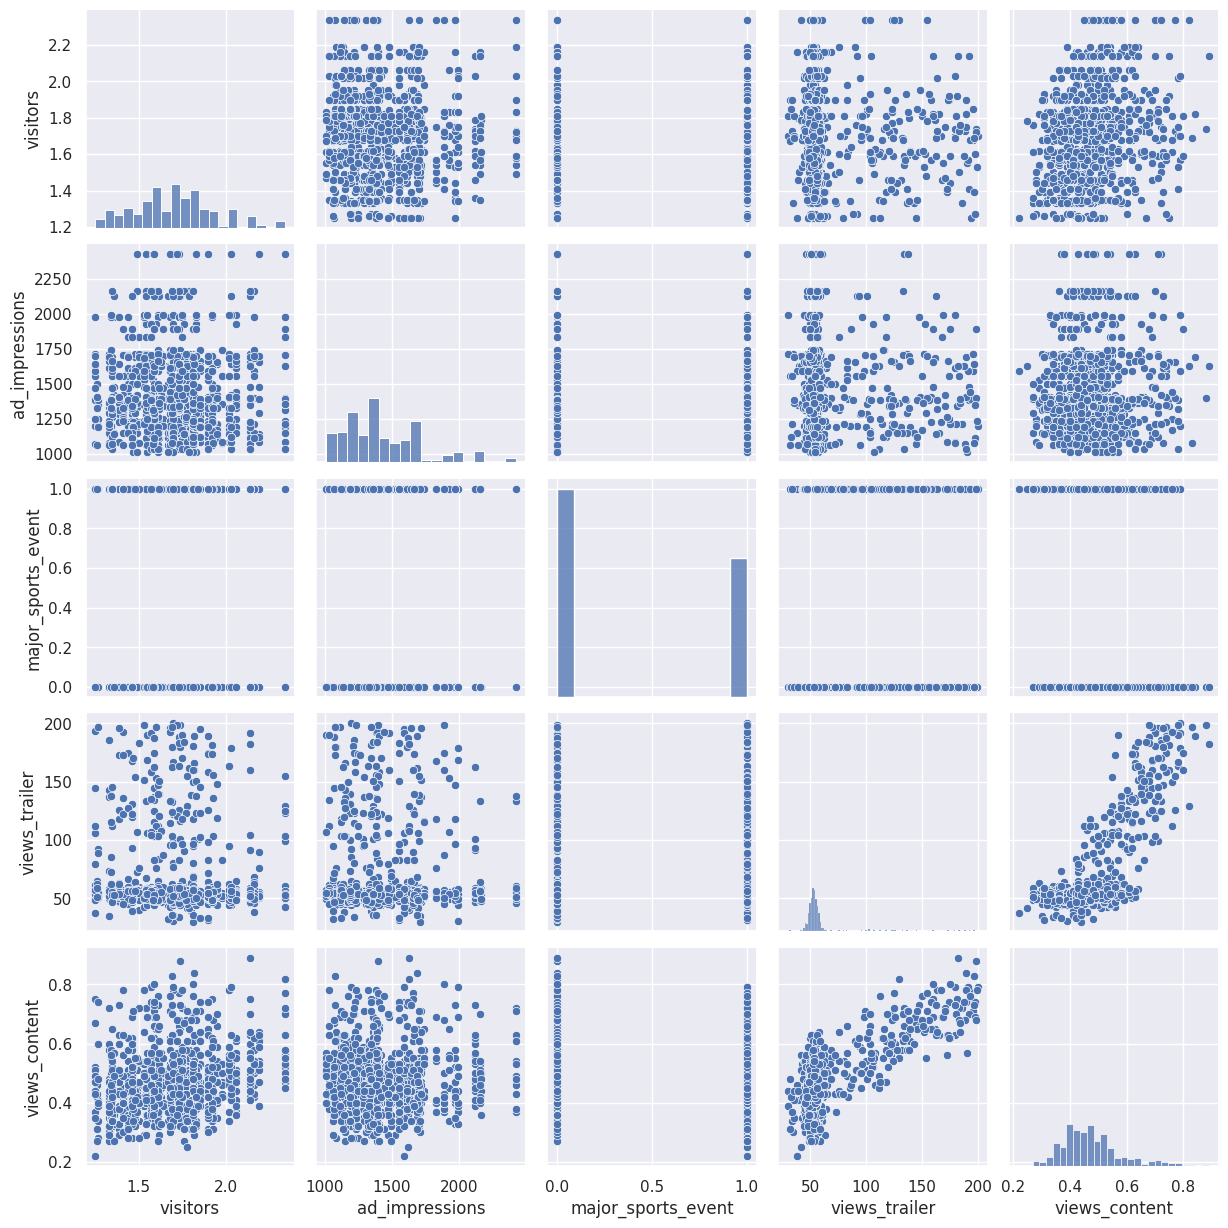

In [ ]:
plt.figure(figsize = (15,15))
sns.pairplot(data = df[num_cols], kind = 'scatter')

### **For the columns `views_trailer` and `views_content`**

<Axes: xlabel='views_content', ylabel='views_trailer'>

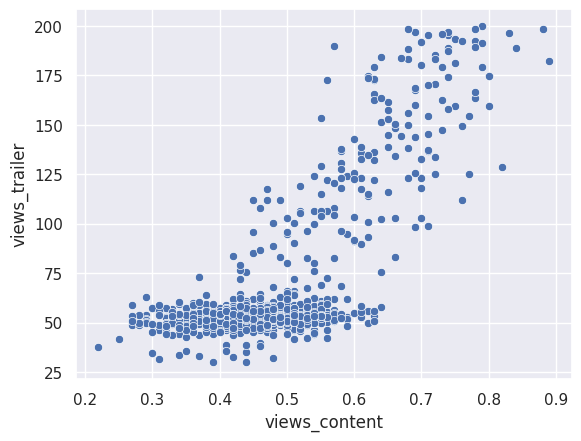

In [ ]:
sns.scatterplot(data = df, x = 'views_content', y = 'views_trailer')

<Axes: xlabel='views_content', ylabel='views_trailer'>

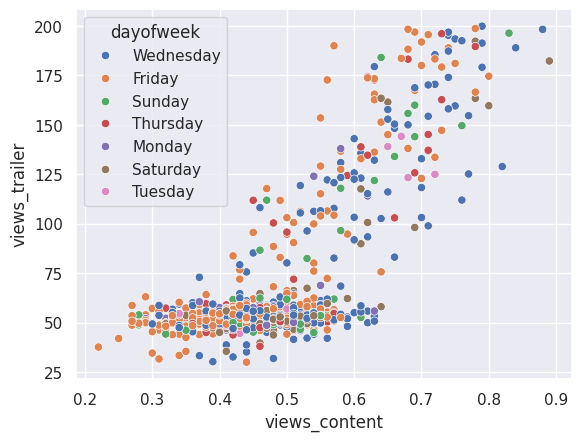

In [ ]:
sns.scatterplot(data = df, x = 'views_content', y = 'views_trailer', hue = 'dayofweek')

<Axes: xlabel='views_content', ylabel='views_trailer'>

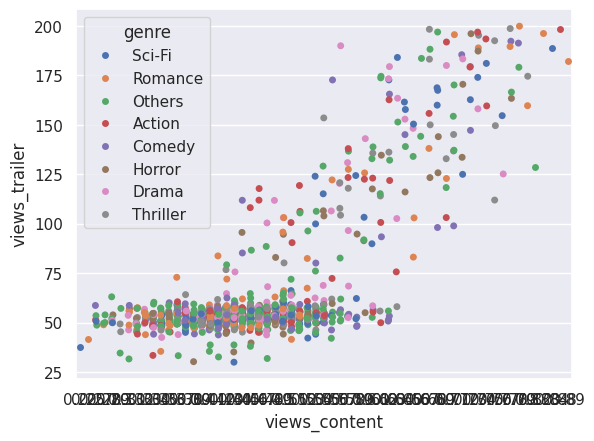

In [ ]:
sns.stripplot(data = df, x = 'views_content', y= 'views_trailer', hue = 'genre')

<Axes: xlabel='views_trailer', ylabel='Count'>

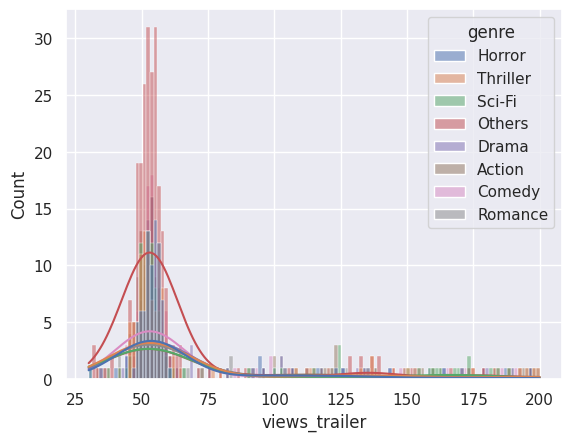

In [ ]:
sns.histplot(data = df, x = 'views_trailer', hue = 'genre', kde = True)

<Axes: ylabel='views_trailer'>

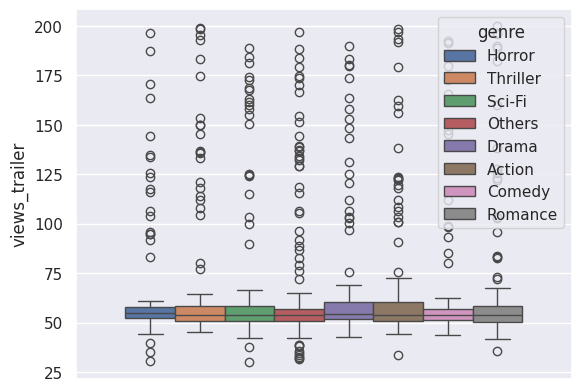

In [ ]:
sns.boxplot(data = df, y = 'views_trailer', hue = 'genre')

<Axes: ylabel='views_content'>

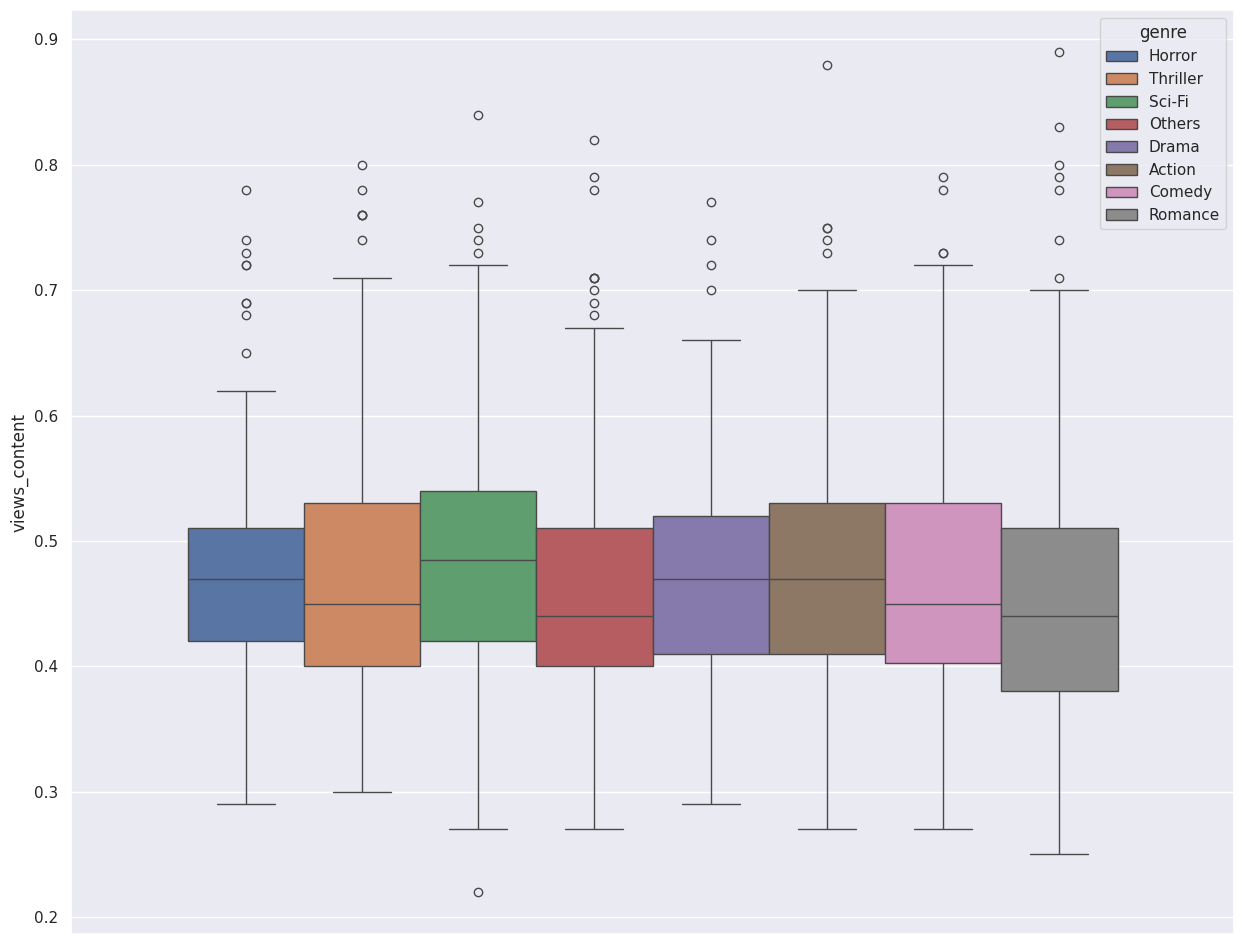

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data = df, y = 'views_content', hue = 'genre')

<Axes: xlabel='views_content', ylabel='Count'>

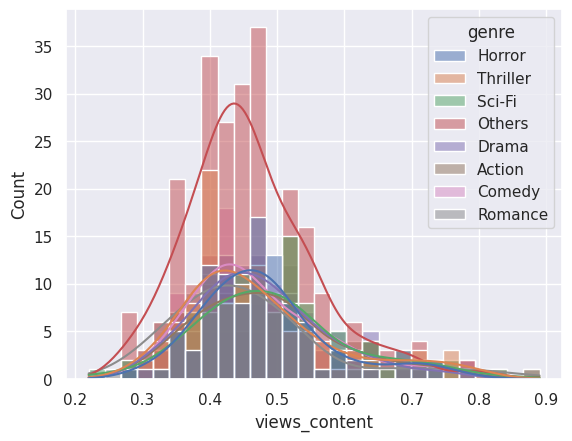

In [ ]:
sns.histplot(data = df, x = 'views_content', hue = 'genre', kde = True)

### **For the column `ad_impressions` and `views_content`**

<Axes: xlabel='ad_impressions', ylabel='views_content'>

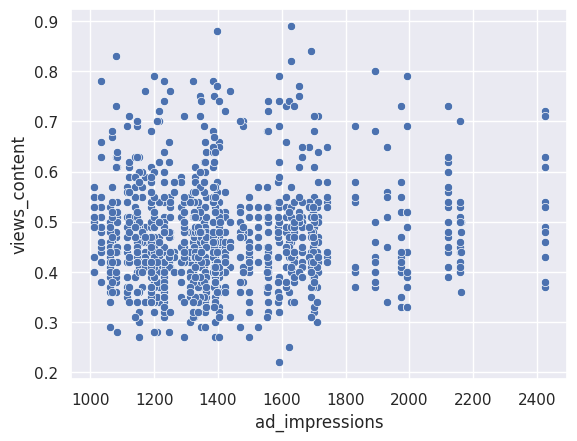

In [ ]:
sns.scatterplot(data = df, x = 'ad_impressions', y = 'views_content')

<Axes: xlabel='views_content', ylabel='Count'>

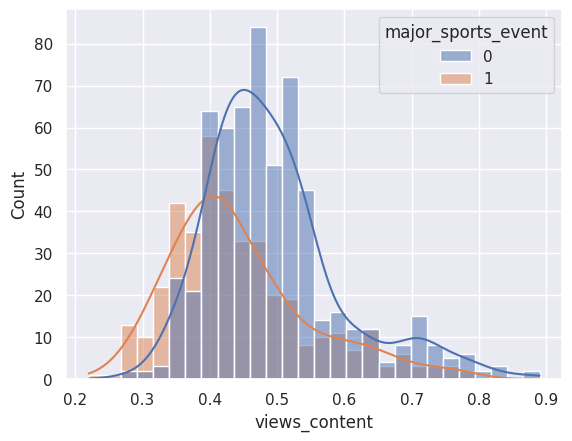

In [ ]:
sns.histplot(data = df, x = 'views_content', hue='major_sports_event', kde = True)

<Axes: ylabel='views_content'>

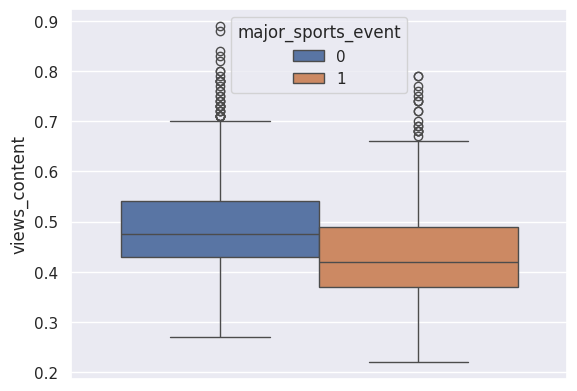

In [ ]:
sns.boxplot(data = df, y = 'views_content', hue='major_sports_event')

<Axes: xlabel='ad_impressions', ylabel='views_content'>

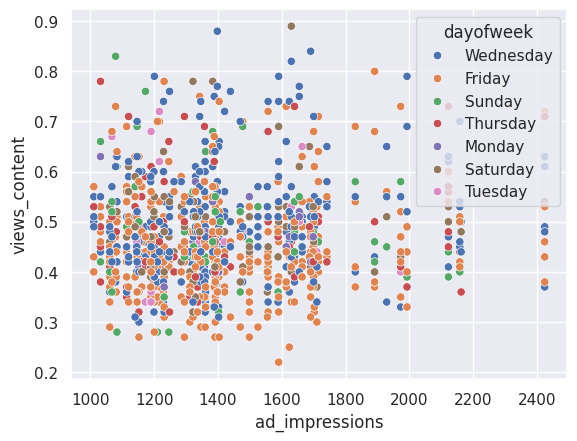

In [ ]:
sns.scatterplot(data = df, x = 'ad_impressions', y = 'views_content', hue = 'dayofweek')

<Axes: xlabel='dayofweek', ylabel='ad_impressions'>

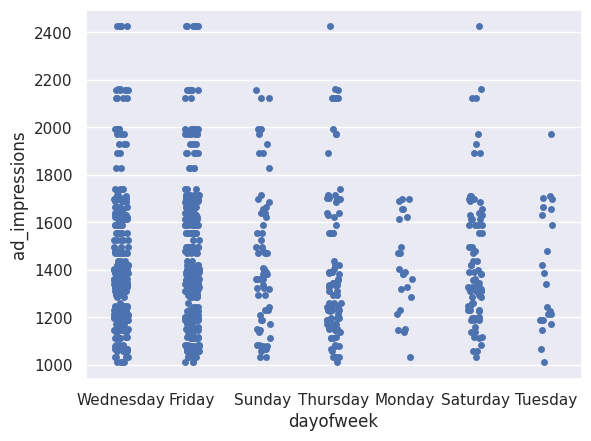

In [ ]:
sns.stripplot(data = df, y = 'ad_impressions', x = 'dayofweek')

<Axes: ylabel='views_content'>

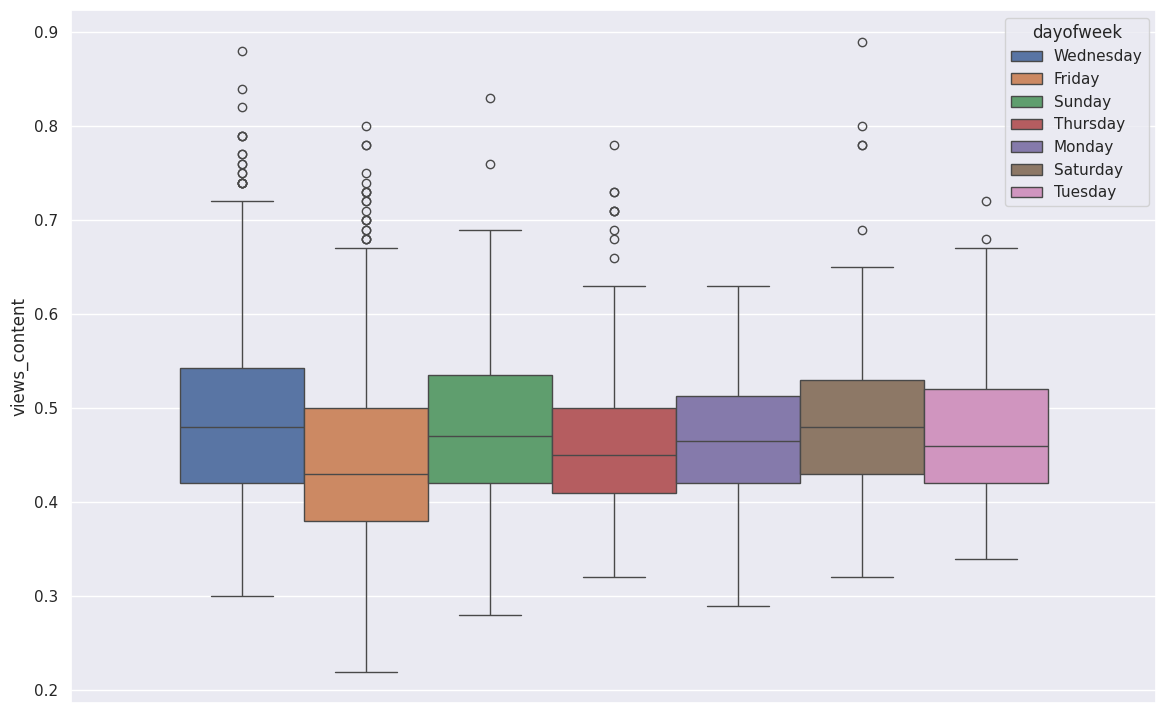

In [ ]:
plt.figure(figsize=(14,9))
sns.boxplot(data = df, y = 'views_content', hue = 'dayofweek')

<Axes: xlabel='views_content', ylabel='Count'>

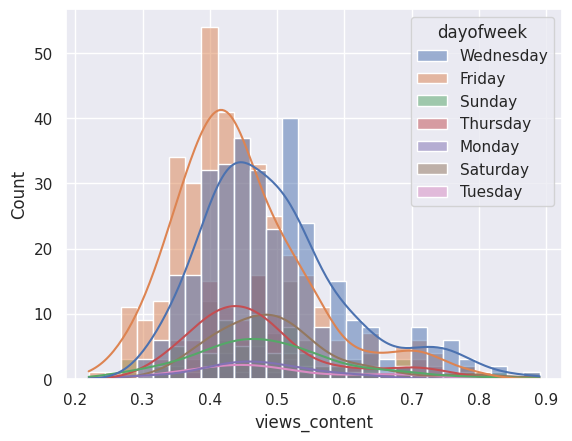

In [ ]:
sns.histplot(data = df, x = 'views_content', hue = 'dayofweek', kde=True)

### **For the column `dayofweek` and `genre`**

<Axes: xlabel='genre'>

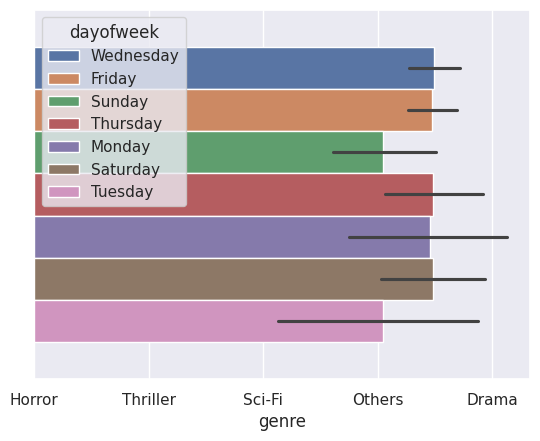

In [ ]:
sns.barplot(data = df, x = 'genre', hue = "dayofweek")

<Axes: ylabel='views_content'>

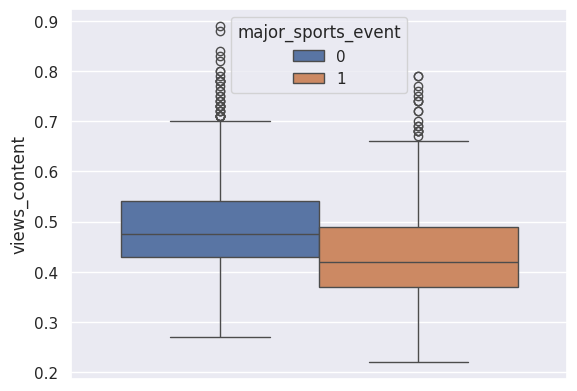

In [ ]:
sns.boxplot(data = df, y = 'views_content', hue = "major_sports_event")

### **For the column `views-content` and`seasons`**

<Axes: ylabel='views_content'>

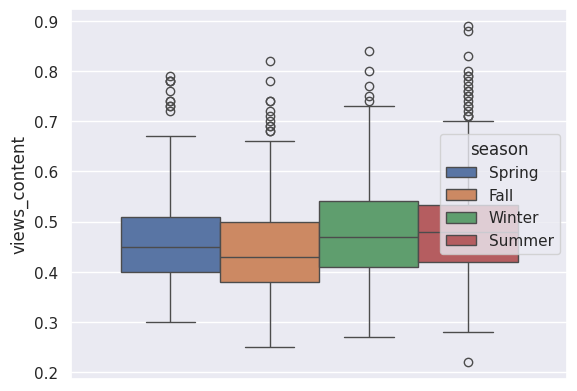

In [ ]:
sns.boxplot(data = df, y = 'views_content', hue = "season")

<Axes: xlabel='views_content', ylabel='Count'>

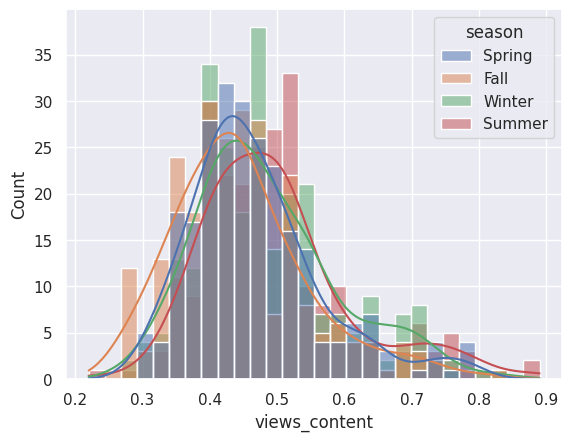

In [ ]:
sns.histplot(data = df, x= 'views_content', hue = "season", kde = True)

### **For the columns `views_content` and `visitors`**

<Axes: xlabel='views_content', ylabel='visitors'>

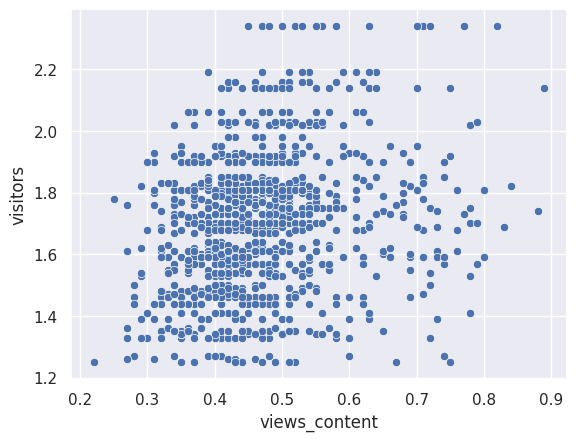

In [ ]:
sns.scatterplot(data = df, x= 'views_content', y = "visitors")

## **Answering Important Questions for EDA**

### **1. What does the distribution of content views look like?**

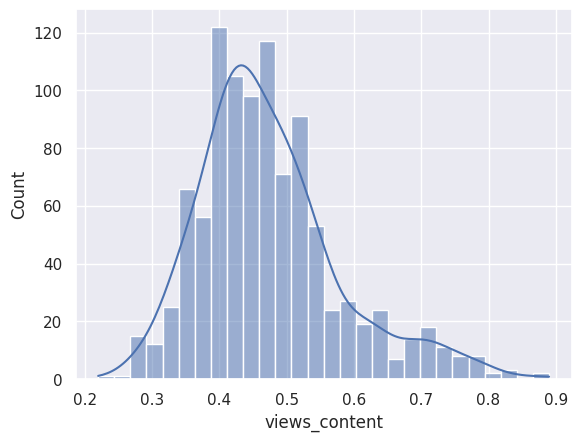

In [ ]:
sns.histplot(data = df, x = 'views_content', kde = True);

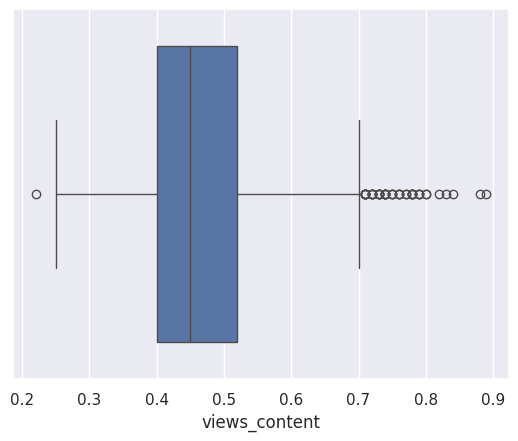

In [ ]:
sns.boxplot(data = df, x = 'views_content');

In [ ]:
df['views_content'].median()

0.45

- The graph is slighlty skewed to the right.
- The column contains few outliers. Which cab be replaced during outlier treatment.
- The median value = **`0.45`**

### **2. What does the distribution of genres look like?**

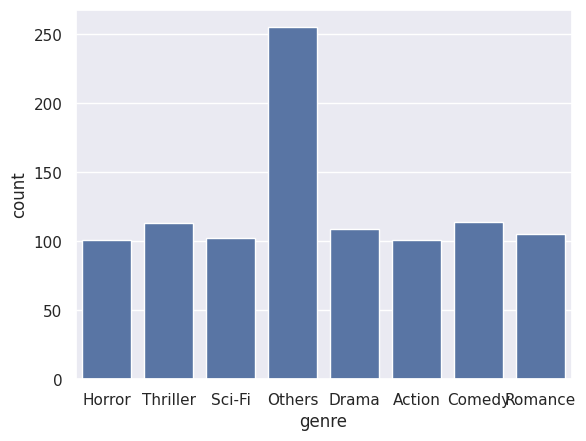

In [ ]:
sns.countplot(data = df, x = "genre");

In [ ]:
df['genre'].value_counts()/df.shape[0]*100

,count
genre,
Others,25.5
Comedy,11.4
Thriller,11.3
Drama,10.9
Romance,10.5
Sci-Fi,10.2
Horror,10.1
Action,10.1


* There are 8 unique values for the column `genre`.
* The value with highest occurence is `Others` about 25.5%. Thevalue with least occurence are `Action`, `Horror` about 10.1% of the total data.
* Rest genre's range between 11.4% to 10.2%.

### **3. The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?**

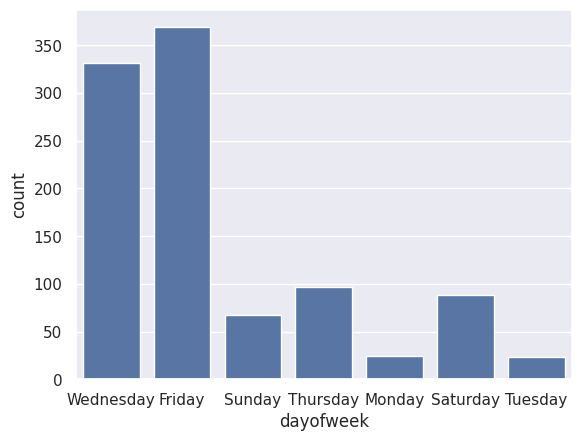

In [ ]:
sns.countplot(data = df, x = 'dayofweek');

In [ ]:
df['dayofweek'].value_counts()/df.shape[0]*100

,count
dayofweek,
Friday,36.9
Wednesday,33.2
Thursday,9.7
Saturday,8.8
Sunday,6.7
Monday,2.4
Tuesday,2.3


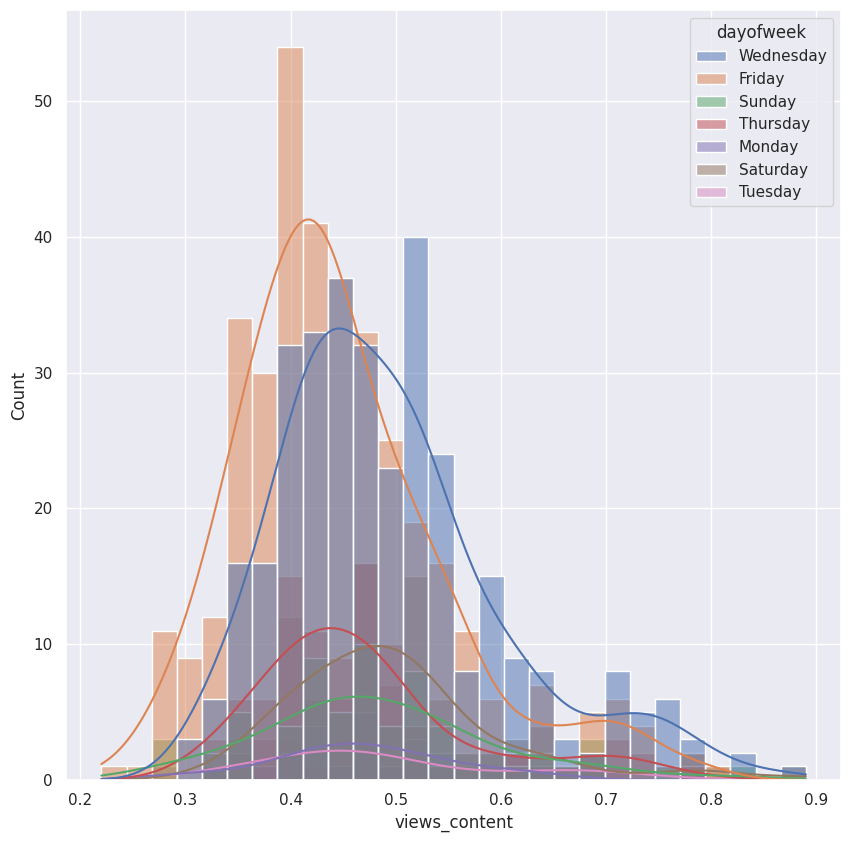

In [ ]:
plt.figure(figsize=(10, 10));
sns.histplot(data = df, x = 'views_content', hue = 'dayofweek', kde=True);
plt.show()

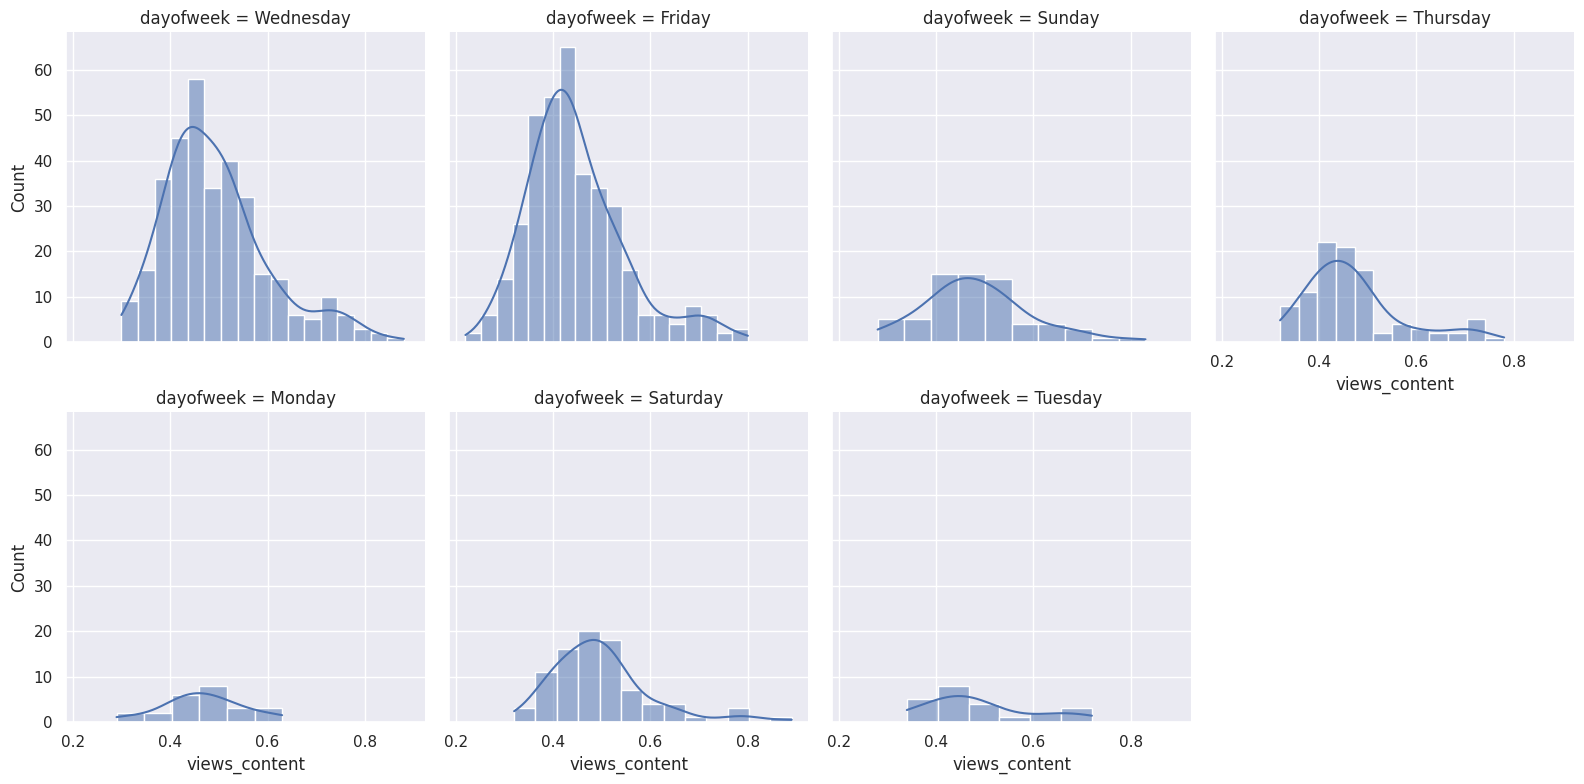

In [ ]:
# Create a FacetGrid, mapping each unique 'season' value to a subplot
g = sns.FacetGrid(df, col="dayofweek", col_wrap=4, height=4)  # Adjust `col_wrap` and `height` as needed
g.map(sns.histplot, "views_content", kde=True)

plt.show()

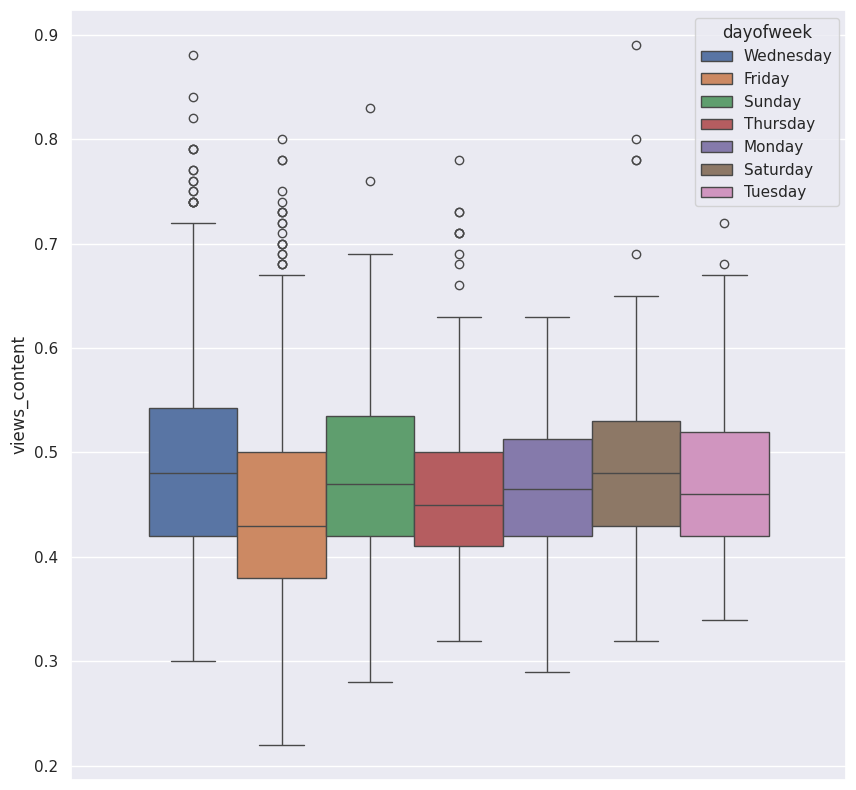

In [ ]:
plt.figure(figsize=(10, 10));
sns.boxplot(data = df, y = 'views_content', hue = 'dayofweek');
plt.show()


### **4. How does the viewership vary with the season of release?**

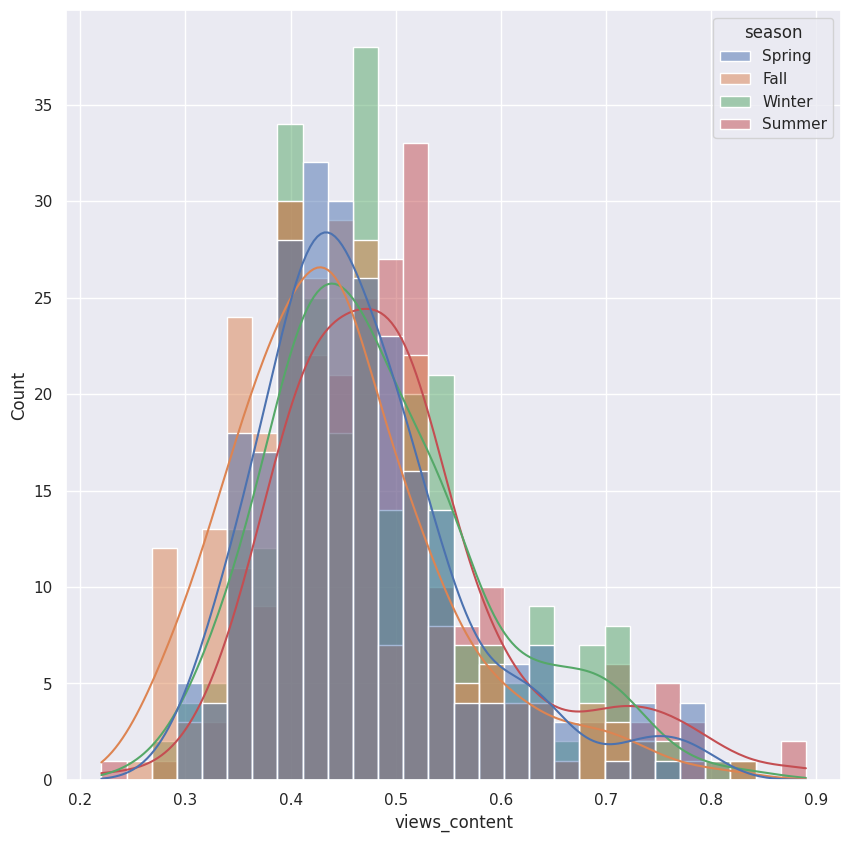

In [ ]:
plt.figure(figsize=(10, 10));
sns.histplot(data = df, x = 'views_content', hue = 'season', kde=True);
plt.show()

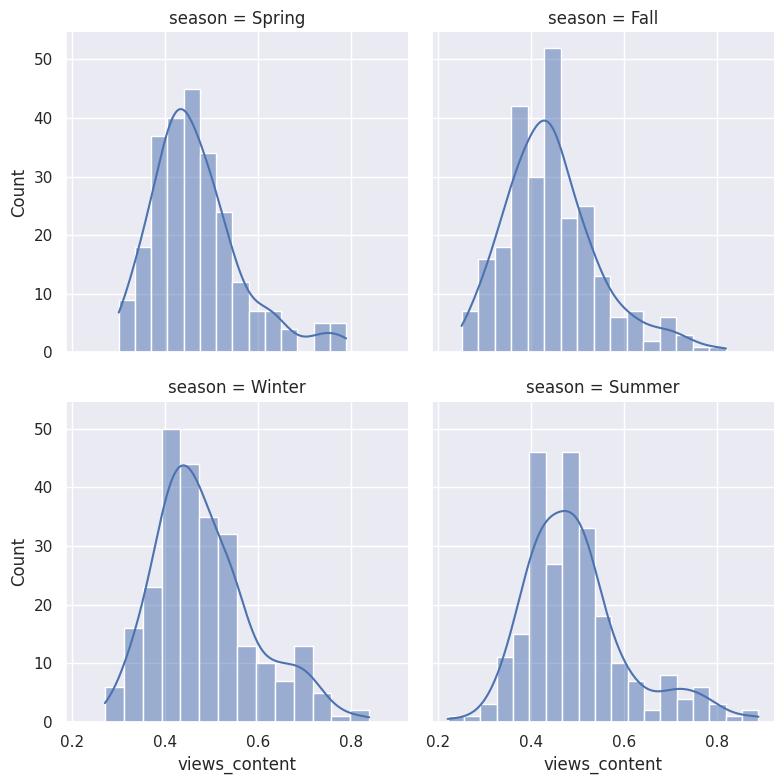

In [ ]:
# Create a FacetGrid, mapping each unique 'season' value to a subplot
g = sns.FacetGrid(df, col="season", col_wrap=2, height=4)  # Adjust `col_wrap` and `height` as needed
g.map(sns.histplot, "views_content", kde=True)

plt.show()

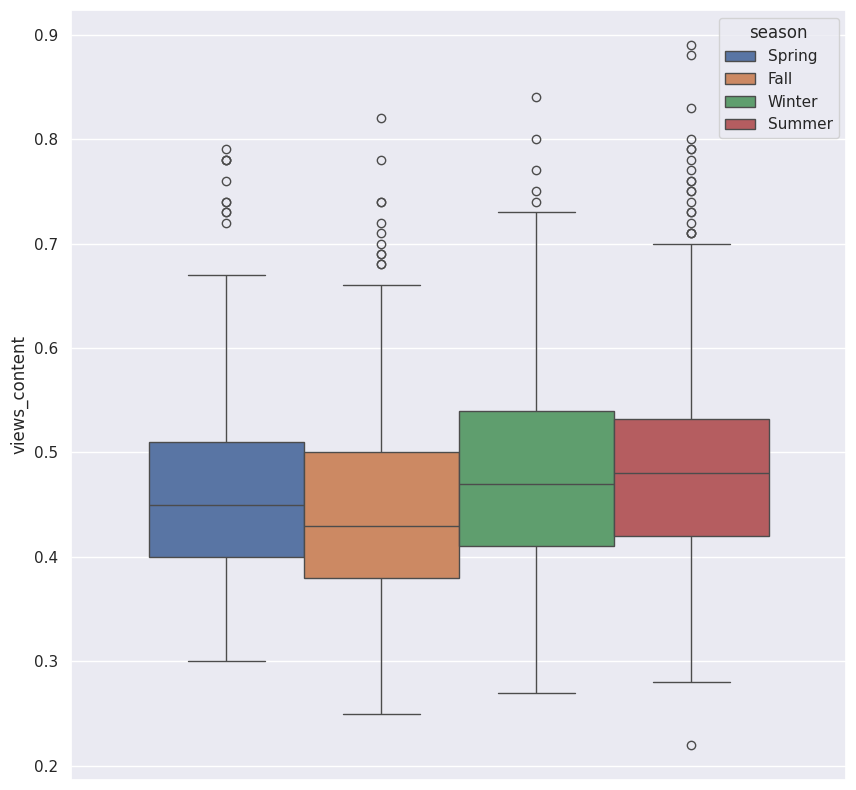

In [ ]:
plt.figure(figsize=(10, 10));
sns.boxplot(data = df, y = 'views_content', hue = 'season');
plt.show()


### **5. What is the correlation between trailer views and content views?**

In [ ]:
correlation = df['views_content'].corr(df['views_trailer'])
print("Correlation between views_content and views_trailer:", correlation)

Correlation between views_content and views_trailer: 0.753962214820536


**The correlation between views_content and views_trailer: 0.753962214820536**

# **Data Preprocessing**

## Checking for duplicate values

In [ ]:
df.duplicated().sum()

0

## Checking for missing values

In [ ]:
df.isnull().sum()

,0
visitors,0
ad_impressions,0
major_sports_event,0
genre,0
dayofweek,0
season,0
views_trailer,0
views_content,0


In [ ]:
# Count NaN values in the 'views_content' column
num_nan = df['views_trailer'].isna().sum()
print("Number of NaN values:", num_nan)

Number of NaN values: 0


## **Outlier Detection and Treatment**

The columns that found to have outliers are:

1. visitors
2. ad_impressions
3. views_trailer
4. views_content

**The method that is used to treat the oultiers is to replace the maximum value obtained from the boxplot. Where this method allows less change in the value**

In [48]:
data = df.copy()

### **For column `visitors`**

In [49]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['visitors'].quantile(0.25)
Q3 = df['visitors'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the maximum value for the box plot (upper whisker)
upper_whisker = Q3 + 1.5 * IQR

print("Upper Whisker (maximum value from the box plot):", upper_whisker)

Upper Whisker (maximum value from the box plot): 2.25


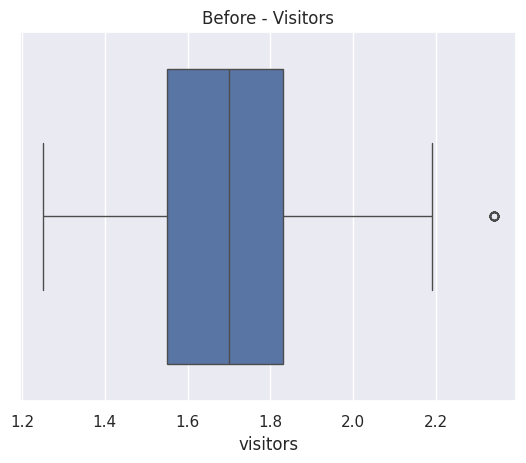

In [50]:
sns.boxplot(data = data, x = 'visitors')
plt.title("Before - Visitors")
plt.show()

In [51]:
data['visitors'] = data['visitors'].apply(lambda x: 2.25 if x >= 2.25 else x)

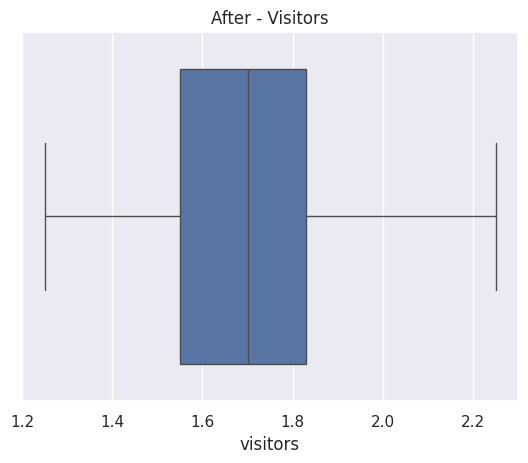

In [52]:
sns.boxplot(data = data, x = 'visitors')
plt.title("After - Visitors")
plt.show()

### **For column `ad_impressions`**

In [53]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ad_impressions'].quantile(0.25)
Q3 = df['ad_impressions'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the maximum value for the box plot (upper whisker)
upper_whisker = Q3 + 1.5 * IQR

print("Upper Whisker (maximum value from the box plot):", upper_whisker)

Upper Whisker (maximum value from the box plot): 2243.6800000000003


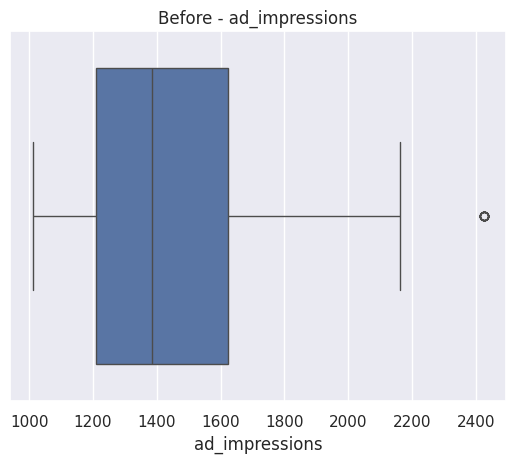

In [54]:
sns.boxplot(data = data, x = 'ad_impressions')
plt.title("Before - ad_impressions")
plt.show()

In [55]:
data['ad_impressions'] = data['ad_impressions'].apply(lambda x: 2243.68 if x >= 2243.68 else x)

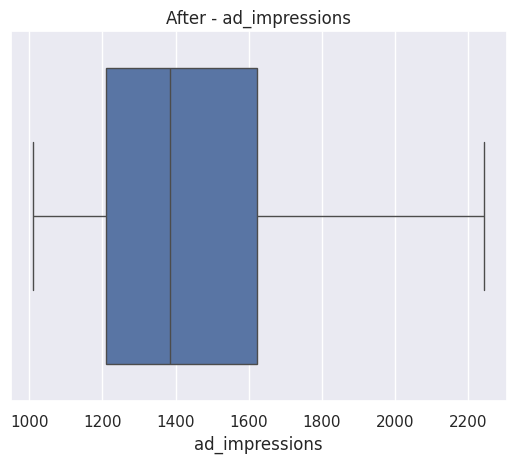

In [56]:
sns.boxplot(data = data, x = 'ad_impressions')
plt.title("After - ad_impressions")
plt.show()

### **For the column `views_trailer`**

In [57]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['views_trailer'].quantile(0.25)
Q3 = df['views_trailer'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the maximum value for the box plot (upper whisker)
upper_whisker = Q3 + 1.5 * IQR

print("Upper Whisker (maximum value from the box plot):", upper_whisker)

Upper Whisker (maximum value from the box plot): 67.96624999999997


In [58]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['views_trailer'].quantile(0.25)
Q3 = df['views_trailer'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the maximum value for the box plot (upper whisker)
upper_whisker = Q3 + 1.5 * IQR

print("Upper Whisker (maximum value from the box plot):", upper_whisker)

# Calculate the lower whisker
lower_whisker = Q1 - 1.5 * IQR

print("Lower Whisker (minimum value from the box plot):", lower_whisker)

Upper Whisker (maximum value from the box plot): 67.96624999999997
Lower Whisker (minimum value from the box plot): 40.73625000000002


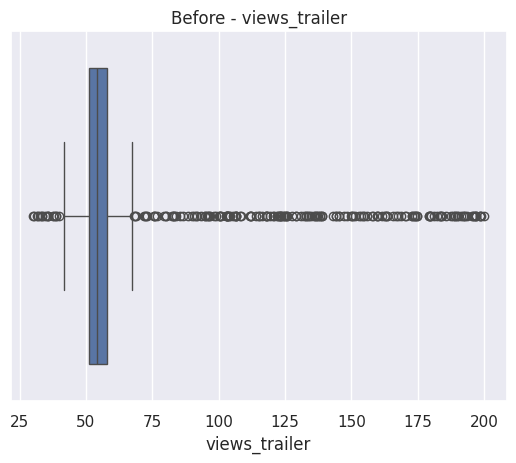

In [59]:
sns.boxplot(data = data, x = 'views_trailer')
plt.title("Before - views_trailer")
plt.show()

In [60]:
def replace_outliers_view_trailer(value):
    if value >= 67.96:
        return 67.96
    elif value <= 40.7:
        return 40.7
    else:
        return round(value, 2)

In [61]:
# Apply the function to 'views_trailer' column directly without using row-wise apply
data['views_trailer'] = data['views_trailer'].apply(replace_outliers_view_trailer)

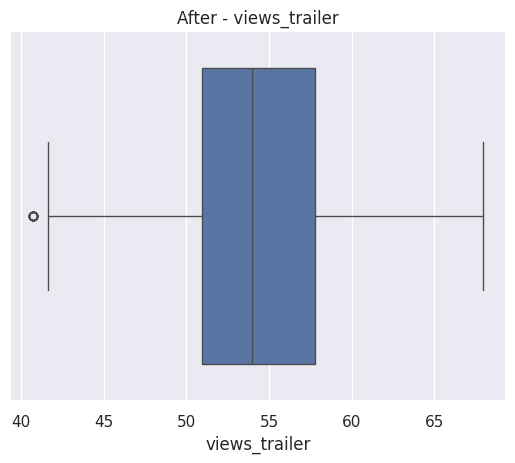

In [62]:
sns.boxplot(data = data, x = 'views_trailer')
plt.title("After - views_trailer")
plt.show()

In [63]:
data['views_trailer'].isnull().sum()

0

In [64]:
data['views_trailer'].isna().sum()

0

In [65]:
df.loc[22,]

,22
visitors,1.41
ad_impressions,1383.58
major_sports_event,0
genre,Comedy
dayofweek,Saturday
season,Summer
views_trailer,192.32
views_content,0.78


In [66]:
df['views_trailer'].mean()

66.91559

In [67]:
data['views_trailer'].mean()

55.468180000000004

### **For the column `views_content`**

In [68]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['views_content'].quantile(0.25)
Q3 = df['views_content'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate the maximum value for the box plot (upper whisker)
upper_whisker = Q3 + 1.5 * IQR

print("Upper Whisker (maximum value from the box plot):", upper_whisker)

Upper Whisker (maximum value from the box plot): 0.7


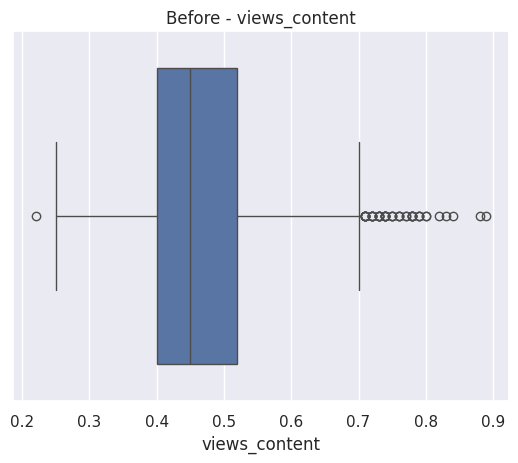

In [69]:
sns.boxplot(data = data, x = 'views_content')
plt.title("Before - views_content")
plt.show()

In [70]:
data['views_content'] = data['views_content'].apply(lambda x: 0.7 if x >= 0.7 else x)

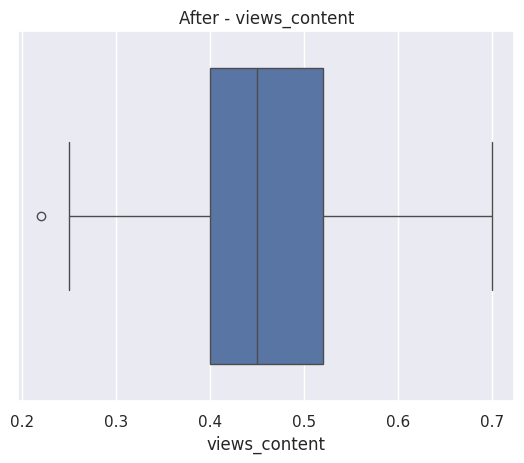

In [71]:
sns.boxplot(data = data, x = 'views_content')
plt.title("After - views_content")
plt.show()

In [72]:
data['views_content'].isna().sum()

0

## **Data preparation for modeling**

- We want to predict the `views_content`
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

- **As we noticed previously that the column `season` is uniformly distributed. Therefore, we are dropping the column to avoid unnnecssary data for training or multi-collinearity**

In [73]:
# Drop column 'season'
data = data.drop('season', axis=1)

In [74]:
data.head(2)

,visitors,ad_impressions,major_sports_event,genre,dayofweek,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,52.69,0.32


### **Encoding categorical data**

In [75]:
# Creating dummy variables for categorical columns in data
data = pd.get_dummies(
    data,
    columns=data.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True
)
data.head()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday
0,1.67,1113.81,0,56.70,0.51,False,False,True,False,False,False,False,False,False,False,False,False,True
1,1.46,1498.41,1,52.69,0.32,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1.47,1079.19,1,48.74,0.39,False,False,False,False,False,False,True,False,False,False,False,False,True
3,1.85,1342.77,1,49.81,0.44,False,False,False,False,False,True,False,False,False,False,False,False,False
4,1.46,1498.41,0,55.83,0.46,False,False,False,False,False,True,False,False,False,True,False,False,False


In [105]:
data.shape

(1000, 18)

### **Feature Selection**


Define Target and Features: Separate the target variable (views_content) and predictor variables (all other columns).

In [76]:
# converting the input attributes into float type for modeling
data = data.astype(float)
data.head()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday
0,1.67,1113.81,0.0,56.70,0.51,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.46,1498.41,1.0,52.69,0.32,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.47,1079.19,1.0,48.74,0.39,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.85,1342.77,1.0,49.81,0.44,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.46,1498.41,0.0,55.83,0.46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [77]:
X = data.drop('views_content', axis=1)
y = data['views_content']

In [78]:
X.head()

,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday
0,1.67,1113.81,0.0,56.70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.46,1498.41,1.0,52.69,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.47,1079.19,1.0,48.74,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.85,1342.77,1.0,49.81,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.46,1498.41,0.0,55.83,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y.head()

,views_content
0,0.51
1,0.32
2,0.39
3,0.44
4,0.46


### **Split the Data**

**Train-Test Split:** Split the dataset into training and testing sets to evaluate the model’s performance. Use an 80-20 split.

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [80]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 800
Number of rows in test data = 200


# **Model Building - Linear Regression**

In [81]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:          views_content   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2518.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):                        0.00
Time:                        13:07:24   Log-Likelihood:                          1059.5
No. Observations:                 800   AIC:                                     -2085.
Df Residuals:                     783   BIC:                                     -2005.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

## **Interpreting the Regression Results:**


1. **Adjusted R-squared**:
   - The Adjusted R-squared value here is **0.982**, which is very high. This indicates that approximately 98.2% of the variance in `views_content` (the dependent variable) is explained by the predictor variables. This suggests a very strong model fit, but it’s essential to watch for overfitting or multicollinearity.

2. **Coefficient of predictor variables**:
   - Each predictor variable has a coefficient, representing the expected change in `views_content` when the predictor variable increases by one unit, assuming all other variables remain constant. Below are a few key coefficients:
     - `visitors`: The coefficient is **0.0653**, meaning that an increase in the `visitors` variable by 1 million is associated with an increase of 0.0653 million views on the first day.
     - `ad_impressions`: The coefficient is **-1.748e-05**, which is negative. This suggests that a very small decrease in first-day views is associated with each additional ad impression, though the impact is minimal.
     - `major_sports_event`: The coefficient is **-0.0644**, suggesting that if a major sports event occurs on the day of release, it is associated with a decrease of 0.0644 million views on the first day.
     - `views_trailer`: The coefficient is **0.0074**, indicating that an increase in trailer views by 1 million is associated with an increase of approximately 0.0074 million views on the first day.
     - Genre and Day of the Week: Different genres and days of the week have varying impacts, which are captured by their respective coefficients. For example:
       - `genre_Comedy` has a coefficient of **-0.0225**, suggesting it may have a small negative association with first-day views compared to the baseline genre.
       - `dayofweek_Saturday` has a positive coefficient of **0.0499**, suggesting releases on Saturdays are associated with a higher viewership.

3. **P-values**:
   - P-values indicate the statistical significance of each predictor. A lower p-value (typically below 0.05) means that the variable is statistically significant in predicting `views_content`.
   - In this output, several predictors are statistically significant (e.g., `visitors`, `views_trailer`, `major_sports_event`, `genre_Comedy`, etc.), while some predictors (e.g., `dayofweek_Thursday`, `dayofweek_Monday`, `genre_Sci-Fi`) have higher p-values and may not be significantly contributing to the model.

4. **Multicollinearity and Condition Number**:
   - The condition number here is **1.24e+04**, which is quite large. A high condition number often indicates multicollinearity, where some predictor variables may be highly correlated with each other. This can make the model coefficients unstable and challenging to interpret. Multicollinearity might require further investigation, possibly by removing or combining highly correlated variables.



## Model Performance Check

Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [82]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [83]:
# checking model performance on train set (seen 80% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.06436,0.051554,0.570123,0.560778,11.379639


In [84]:
# checking model performance on test set (seen 20% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.071664,0.056003,0.497292,0.450336,11.771197


# **Testing the assumptions of linear regression model**

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

## Test for Multicollinearity

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [85]:
checking_vif(X_train)

,feature,VIF
0,visitors,35.931319
1,ad_impressions,23.708231
2,major_sports_event,1.729110
3,views_trailer,40.365756
4,genre_Comedy,2.032208
5,genre_Drama,2.046048
6,genre_Horror,2.016932
7,genre_Others,3.123507
8,genre_Romance,1.906683
9,genre_Sci-Fi,1.993902


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with **VIF > 5 (`visitors`, `ad_impressions`, `views_trailer`)**
* We will ignore the VIF values for dummy variables and the constant (intercept)

### **Removing Multicollinearity**

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

In [43]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [86]:
col_list = ["visitors", "ad_impressions", 'views_trailer']

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ad_impressions,0.981552,0.065227
1,visitors,0.980124,0.067706
2,views_trailer,0.963053,0.092310


In [ ]:
col_to_drop = "visitors"
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  visitors


,feature,VIF
0,ad_impressions,20.958599
1,major_sports_event,1.729044
2,views_trailer,26.288849
3,genre_Comedy,2.008387
4,genre_Drama,2.026158
5,genre_Horror,1.988251
6,genre_Others,3.068165
7,genre_Romance,1.883349
8,genre_Sci-Fi,1.977379
9,genre_Thriller,2.028752


In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                                 OLS Regression Results                                
Dep. Variable:          views_content   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2467.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):                        0.00
Time:                        07:06:55   Log-Likelihood:                          1027.0
No. Observations:                 800   AIC:                                     -2022.
Df Residuals:                     784   BIC:                                     -1947.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [87]:
col_to_drop = "ad_impressions"
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ad_impressions


,feature,VIF
0,visitors,31.764079
1,major_sports_event,1.727273
2,views_trailer,34.401304
3,genre_Comedy,2.018979
4,genre_Drama,2.030119
5,genre_Horror,2.007593
6,genre_Others,3.103205
7,genre_Romance,1.895372
8,genre_Sci-Fi,1.953653
9,genre_Thriller,2.039463


In [88]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                                 OLS Regression Results                                
Dep. Variable:          views_content   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2661.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):                        0.00
Time:                        13:08:24   Log-Likelihood:                          1056.8
No. Observations:                 800   AIC:                                     -2082.
Df Residuals:                     784   BIC:                                     -2007.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [ ]:
col_to_drop = "views_trailer"
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  views_trailer


,feature,VIF
0,visitors,23.400850
1,ad_impressions,20.205099
2,major_sports_event,1.696964
3,genre_Comedy,1.976223
4,genre_Drama,1.987320
5,genre_Horror,1.955056
6,genre_Others,3.005067
7,genre_Romance,1.856419
8,genre_Sci-Fi,1.954830
9,genre_Thriller,1.995776


In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                                 OLS Regression Results                                
Dep. Variable:          views_content   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              1304.
Date:                Fri, 15 Nov 2024   Prob (F-statistic):                        0.00
Time:                        07:05:25   Log-Likelihood:                          779.01
No. Observations:                 800   AIC:                                     -1526.
Df Residuals:                     784   BIC:                                     -1451.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

### **Dealing with high p-value variables**

In [89]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['visitors', 'major_sports_event', 'views_trailer', 'genre_Comedy', 'genre_Drama', 'genre_Horror', 'genre_Others', 'genre_Romance', 'genre_Thriller', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Tuesday', 'dayofweek_Wednesday']


In [90]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [91]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                                 OLS Regression Results                                
Dep. Variable:          views_content   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3272.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):                        0.00
Time:                        13:08:41   Log-Likelihood:                          1054.9
No. Observations:                 800   AIC:                                     -2084.
Df Residuals:                     787   BIC:                                     -2023.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [92]:
# checking model performance on train set (seen 80% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.064728,0.052093,0.565192,0.558001,11.510522


In [93]:
# checking model performance on test set (seen 20% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.072523,0.057122,0.485175,0.449192,12.026386


**Observations**

- The training $R^2$ is 0.071, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict views_content within a mean error of 0.057 on the test data

- MAPE of 12.6 on the test data means that we are able to predict within 11.9% of the views_content

## **Test For Linearity and Independence**

In [94]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
382,0.32,0.453545,-0.133545
994,0.60,0.606797,-0.006797
982,0.43,0.454736,-0.024736
47,0.60,0.527430,0.072570
521,0.42,0.329040,0.090960


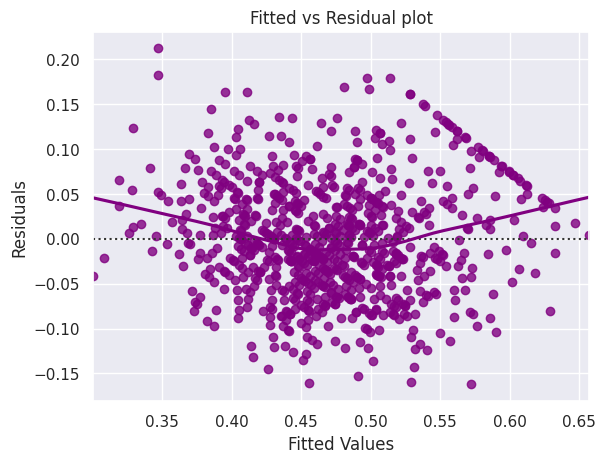

In [95]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

## **Test For Normality**

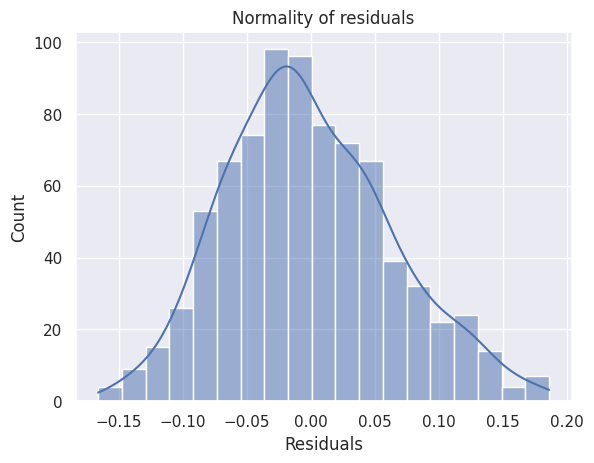

In [96]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

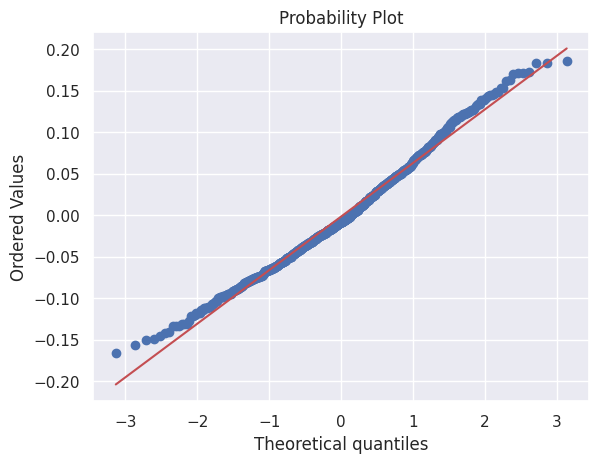

In [97]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.988417197334189, pvalue=5.907110581821416e-06)

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

## **Test for Homoscedasticity**

In [104]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 0.9996562991856576), ('p-value', 0.5013480604859757)]

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

# **Predictions on test data**

In [99]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
486,0.38,0.456195
872,0.41,0.450870
404,0.31,0.312316
911,0.40,0.343906
531,0.40,0.452640
608,0.34,0.409410
671,0.37,0.478090
242,0.50,0.507300
374,0.70,0.597760
797,0.49,0.416992


- **We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable**

# **Final Model**

In [100]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [101]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                                 OLS Regression Results                                
Dep. Variable:          views_content   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3272.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):                        0.00
Time:                        13:09:30   Log-Likelihood:                          1054.9
No. Observations:                 800   AIC:                                     -2084.
Df Residuals:                     787   BIC:                                     -2023.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [102]:
# checking model performance on train set (seen 80% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.064728,0.052093,0.565192,0.558001,11.510522


In [103]:
# checking model performance on test set (seen 20% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.072523,0.057122,0.485175,0.449192,12.026386


# **Conclusion**

### **Model Performance**
- **R-squared (uncentered)**: 0.982
  - Indicates that the model explains **98.2% of the variance** in the dependent variable. This is a strong fit.
  
- **Adjusted R-squared (uncentered)**: 0.982
  - Similar to R-squared, confirming that the model's predictive capability is robust even after adjusting for the number of predictors.

- **F-statistic**: 3272
  - A high value with a **p-value of 0.00**, indicating that the model as a whole is statistically significant.

---

### **Key Predictors and Their Significance**
Predictors are analyzed based on their **p-value** (< 0.05 is considered significant):

1. **Significant Predictors** (p-value < 0.05):
   - **`visitors`**:
     - Coefficient: 0.0590
     - Positive effect: An increase in visitors is associated with increased first-day content viewership.
   - **`major_sports_event`**:
     - Coefficient: -0.0643
     - Negative effect: Major sports events negatively impact viewership, likely due to a clash in viewer attention.
   - **`views_trailer`**:
     - Coefficient: 0.0072
     - Positive effect: Higher trailer views are associated with slightly higher content viewership.
   - **Genres (`genre_Comedy`, `genre_Drama`, `genre_Horror`, `genre_Romance`, `genre_Thriller`)**:
     - All show negative coefficients, meaning these genres may receive relatively fewer views compared to other genres (base category).
   - **Days of the week (`Saturday`, `Sunday`, `Tuesday`, `Wednesday`)**:
     - Positive coefficients, suggesting higher viewership on these days, likely due to increased leisure time.
   
2. **Non-Significant Predictors** (p-value > 0.05):
   - None. All predictors in this model are statistically significant.

---

### **Business Takeaways**
1. **Leverage High-Impact Factors**:
   - Focus on increasing **visitors** to the platform, as it has the most substantial positive influence on first-day content viewership.
   - Promote trailers to boost engagement and maximize the positive impact of `views_trailer`.

2. **Address Competition During Major Sports Events**:
   - The significant negative impact of `major_sports_event` suggests that marketing efforts and new content releases should avoid competing with major sporting events.

3. **Genre-Specific Strategies**:
   - Genres such as **Comedy, Drama, Horror, Romance, and Thriller** exhibit a relative drop in viewership. Consider promoting these genres more aggressively or diversifying content types.

4. **Optimize Timing for Releases**:
   - Focus on releasing content on **weekends (Saturday, Sunday)** or during favorable weekdays like **Tuesday and Wednesday**, which are associated with higher viewership.

5. **Further Validation**:
   - Although the model shows strong performance, periodically revalidate predictors since viewer preferences can shift over time.

---


# **Model - Buliding with `season` column**

## **Data preparation for modelling**

In [30]:
# Creating dummy variables for categorical columns in data
data = pd.get_dummies(
    data,
    columns=data.select_dtypes(include=["object"]).columns.tolist(),
    drop_first=True
)
data.head()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,0,56.70,0.51,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.46,1498.41,1,52.69,0.32,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.47,1079.19,1,48.74,0.39,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.85,1342.77,1,49.81,0.44,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.46,1498.41,0,55.83,0.46,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


In [31]:
# converting the input attributes into float type for modeling
data = data.astype(float)
data.head()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,0.0,56.70,0.51,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.46,1498.41,1.0,52.69,0.32,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.47,1079.19,1.0,48.74,0.39,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.85,1342.77,1.0,49.81,0.44,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.46,1498.41,0.0,55.83,0.46,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
X = data.drop('views_content', axis=1)
y = data['views_content']

In [33]:
X.head()

,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,0.0,56.70,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.46,1498.41,1.0,52.69,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.47,1079.19,1.0,48.74,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.85,1342.77,1.0,49.81,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.46,1498.41,0.0,55.83,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
y.head()

,views_content
0,0.51
1,0.32
2,0.39
3,0.44
4,0.46


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [36]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 800
Number of rows in test data = 200


In [37]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                                 OLS Regression Results                                
Dep. Variable:          views_content   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2222.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):                        0.00
Time:                        12:58:00   Log-Likelihood:                          1075.6
No. Observations:                 800   AIC:                                     -2111.
Df Residuals:                     780   BIC:                                     -2018.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [39]:
# checking model performance on train set (seen 80% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.063073,0.050419,0.587137,0.576537,11.092875


In [40]:
# checking model performance on test set (seen 20% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.071286,0.055951,0.502577,0.446999,11.68156


## **Testing the assumptions of linear regression model**

In [42]:
checking_vif(X_train)

,feature,VIF
0,visitors,36.208711
1,ad_impressions,23.900832
2,major_sports_event,1.734334
3,views_trailer,41.428485
4,genre_Comedy,2.038068
5,genre_Drama,2.064570
6,genre_Horror,2.052349
7,genre_Others,3.190512
8,genre_Romance,1.928559
9,genre_Sci-Fi,2.026424


In [44]:
col_list = ["visitors", "ad_impressions", 'views_trailer']

res = treating_multicollinearity(X_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,ad_impressions,0.982153,0.064157
1,visitors,0.980960,0.066266
2,views_trailer,0.965226,0.089554


In [45]:
col_to_drop = "ad_impressions"
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  ad_impressions


,feature,VIF
0,visitors,32.244213
1,major_sports_event,1.732910
2,views_trailer,35.916579
3,genre_Comedy,2.024370
4,genre_Drama,2.047796
5,genre_Horror,2.039701
6,genre_Others,3.165356
7,genre_Romance,1.915051
8,genre_Sci-Fi,1.983921
9,genre_Thriller,2.074188


In [46]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                                 OLS Regression Results                                
Dep. Variable:          views_content   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2318.
Date:                Sun, 17 Nov 2024   Prob (F-statistic):                        0.00
Time:                        13:03:35   Log-Likelihood:                          1071.6
No. Observations:                 800   AIC:                                     -2105.
Df Residuals:                     781   BIC:                                     -2016.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------